In [1]:
from pynq import Overlay
from pynq import allocate
import numpy as np
import matplotlib.pyplot as plt

ol = Overlay("dma.bit")

In [2]:
data_size = 1024

In [3]:
ol?

In [4]:
dma = ol.axi_dma_0

In [10]:
dma_send = dma.sendchannel
dma_recv = dma.recvchannel

In [11]:
output_buffer = allocate(shape=(data_size,), dtype=np.uint32)

In [17]:
dma_recv.transfer(output_buffer)
dma_recv.wait()

In [13]:
for i in range(data_size):
    output_buffer[i] &= 0x0FFF

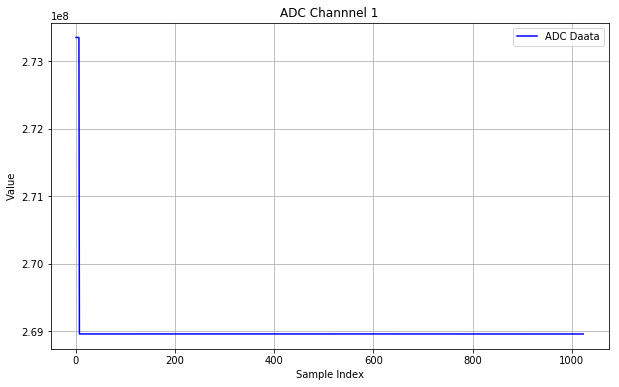

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(output_buffer, linestyle='-', color='b', label="ADC Daata")
plt.title("ADC Channnel 1")
plt.xlabel("Sample Index")
plt.ylabel("Value")
plt.grid(True)
plt.legend()
plt.show()